In [1]:
from compare_solutions import load_competiton_solution, load_my_solution, load_my_solution_layer, plot_diff_heatmap, plot_one_unit
import numpy as np
import torch

In [2]:
output_path = "data/starting_kit/Train_Data/instance_2021_Q1_1/OutputData.json"
competition_solution = load_competiton_solution(output_path)
my_solution_path = "ed_solution_layer.pkl"
my_solution = load_my_solution_layer(my_solution_path)
my_solution_cvx = load_my_solution("ed_solution_again.pkl")

In [3]:
for key, value in competition_solution.items():
    if key not in ["thermal_units_names", "profiled_units_names", "storage_units_names"]:
        print(key)
        a = competition_solution[key]
        b = my_solution[key] if isinstance(my_solution[key], np.ndarray) else my_solution[key].cpu().numpy()
        comparison = np.isclose(
            a, b, atol=1e-2
        )
        print(comparison.size)
        print(np.sum(comparison))
        accuracy =100 * np.sum(comparison) / comparison.size
        print(f"Variable: {key}, Accuracy: {accuracy:.4f}")

profiled_generation
1224
881
Variable: profiled_generation, Accuracy: 71.9771
thermal_generation
3672
3354
Variable: thermal_generation, Accuracy: 91.3399
charge_rate
1008
702
Variable: charge_rate, Accuracy: 69.6429
discharge_rate
1008
770
Variable: discharge_rate, Accuracy: 76.3889
storage_level
1008
308
Variable: storage_level, Accuracy: 30.5556
curtailment
72
51
Variable: curtailment, Accuracy: 70.8333


In [4]:
diff = my_solution["profiled_generation"].squeeze(0).numpy() - competition_solution["profiled_generation"]
print(f"Max difference in profiled_generation: {np.max(np.abs(diff))}")

Max difference in profiled_generation: 0.10051328124995962


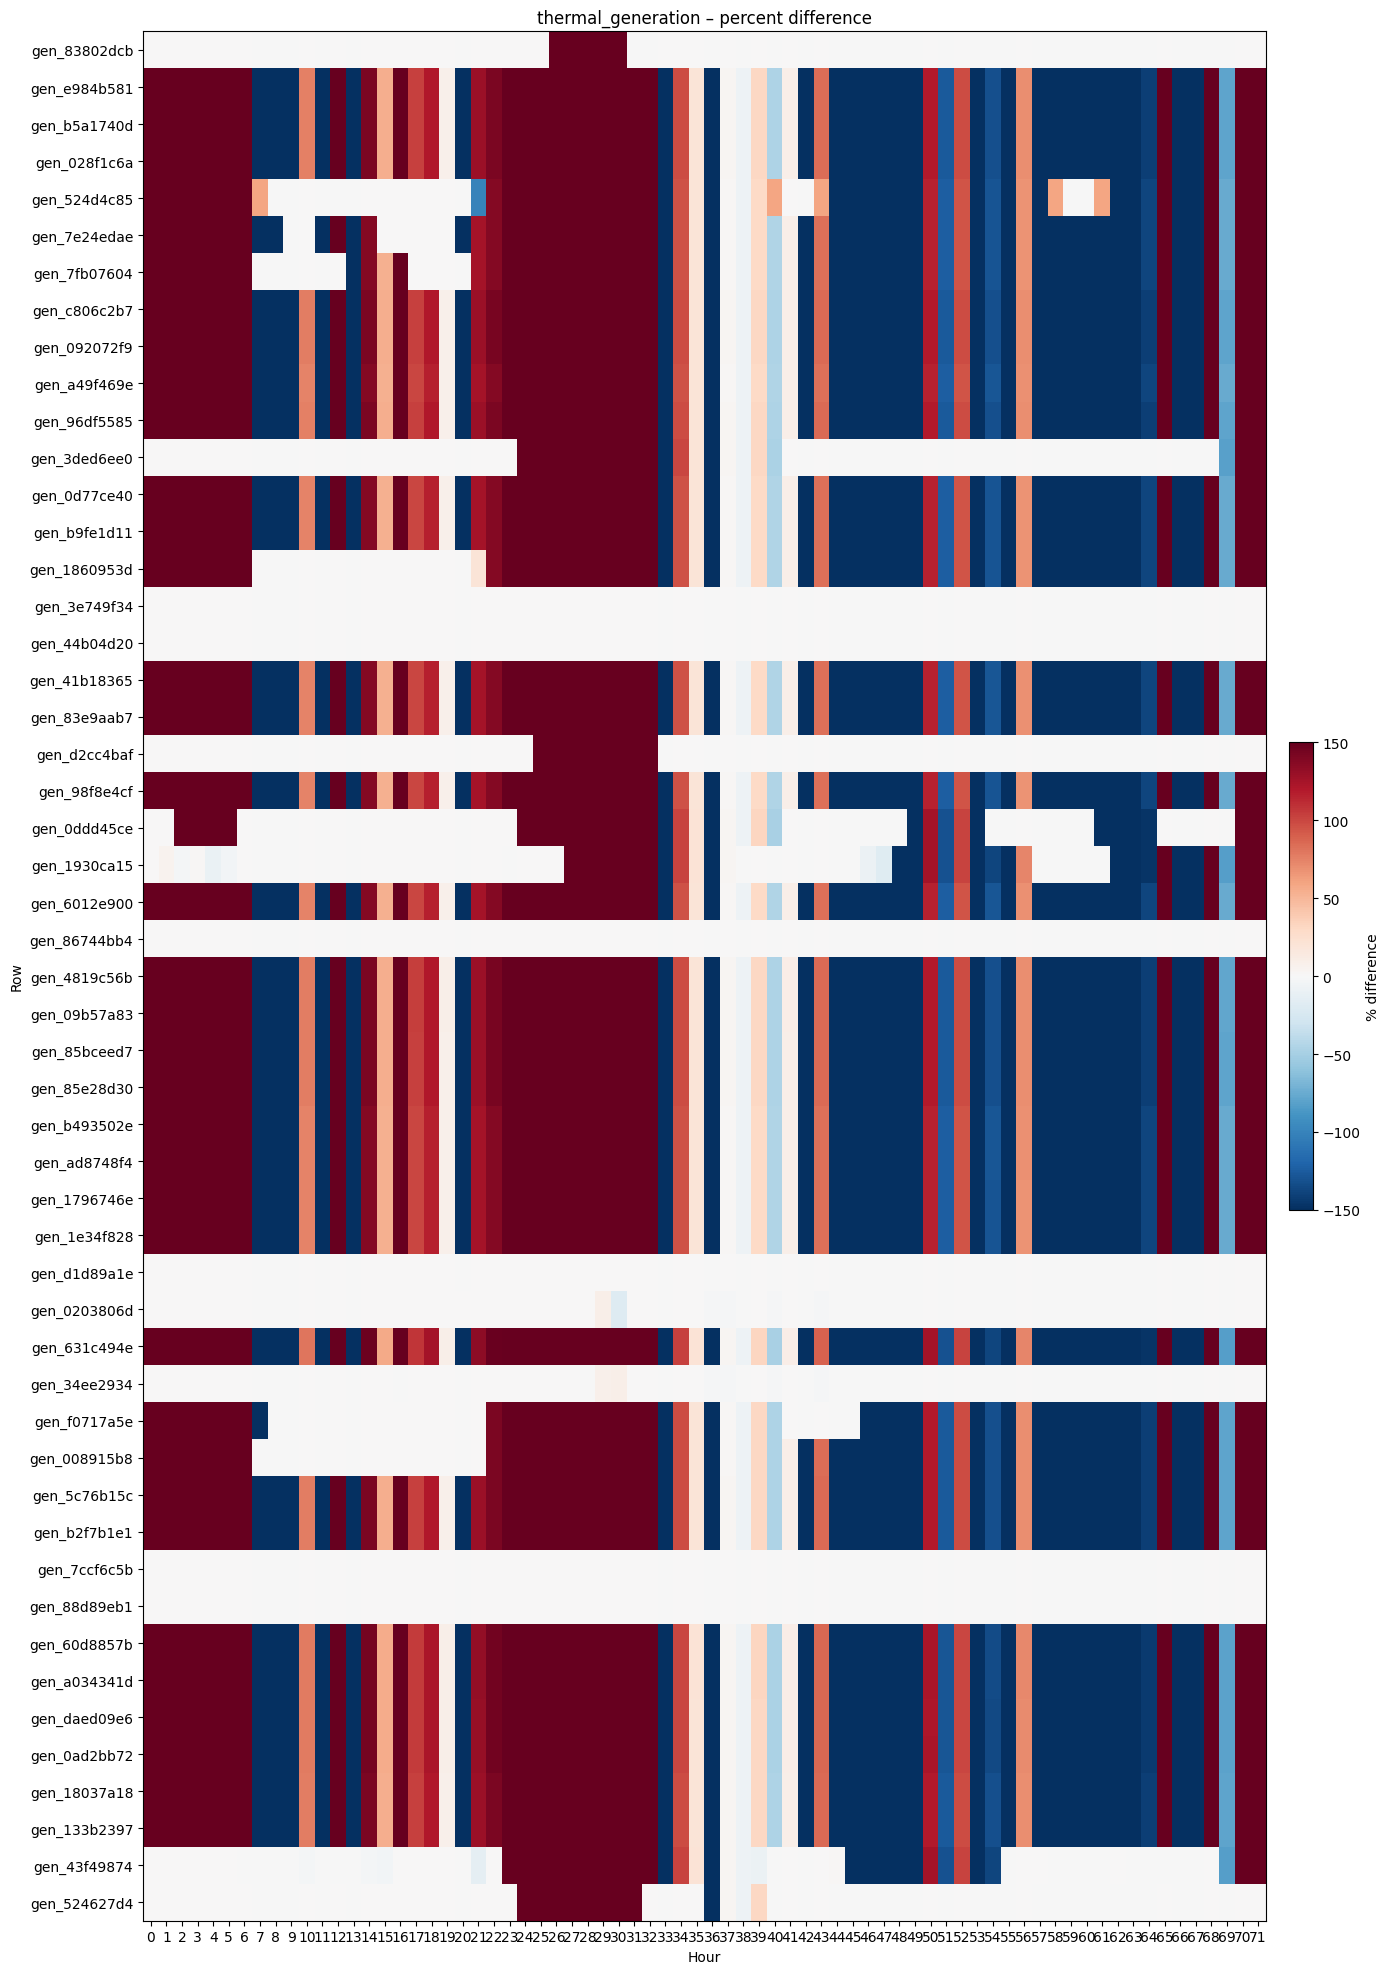

In [5]:
plot_diff_heatmap("thermal_generation", my_solution, competition_solution)

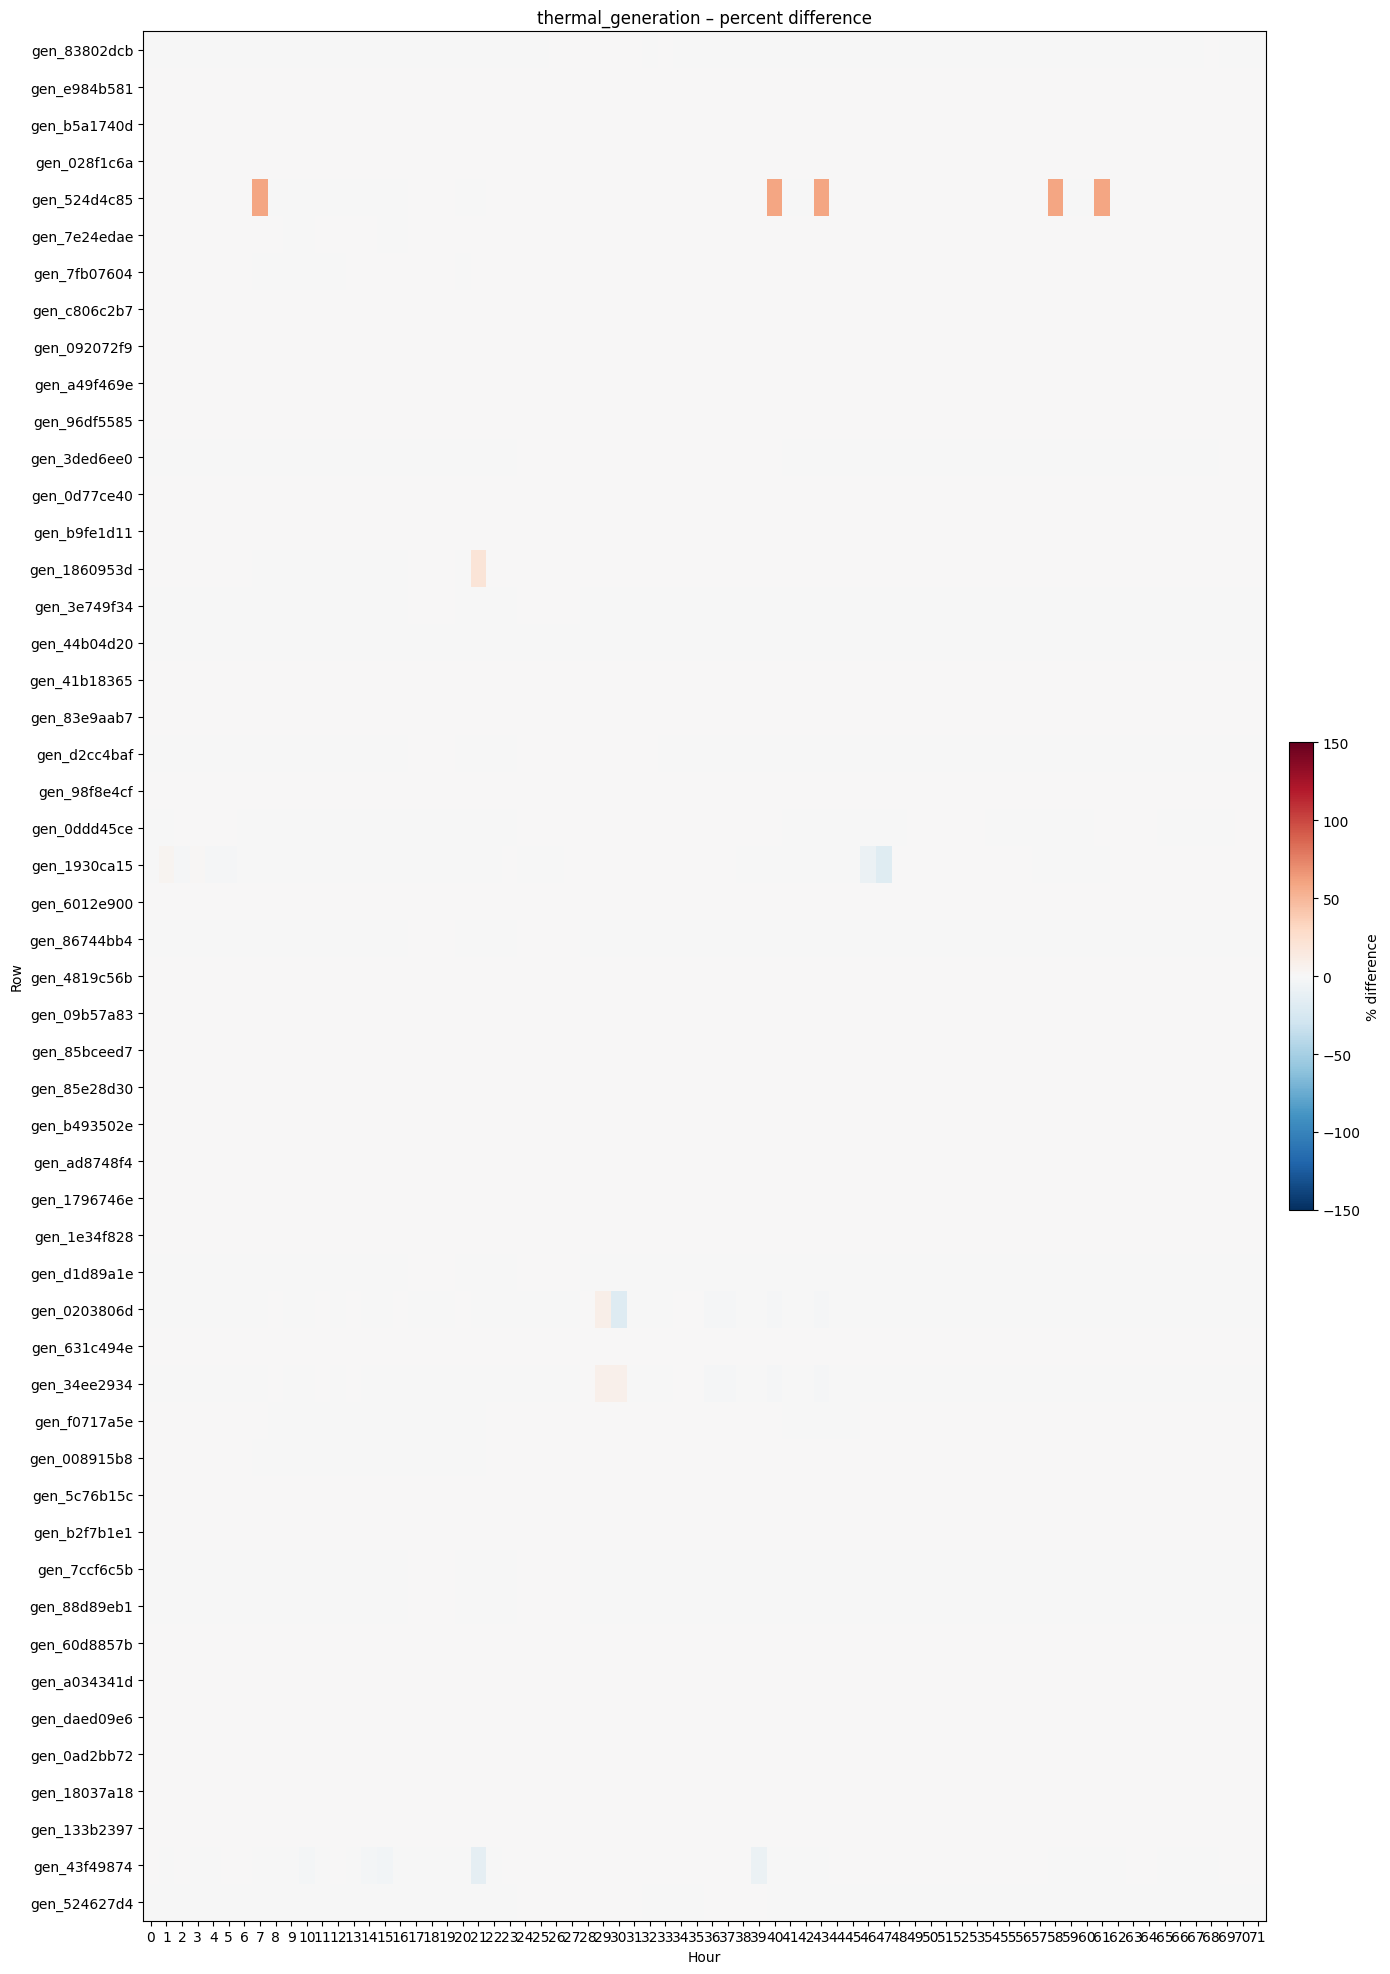

In [6]:
plot_diff_heatmap("thermal_generation", my_solution_cvx, competition_solution)

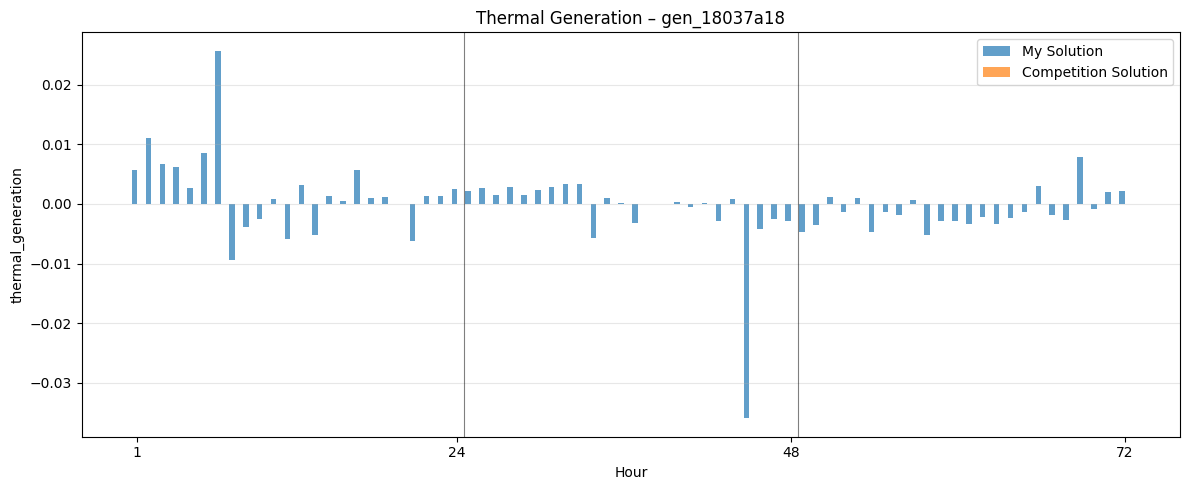

In [7]:
plot_one_unit("thermal_generation", "gen_18037a18", my_solution, competition_solution)

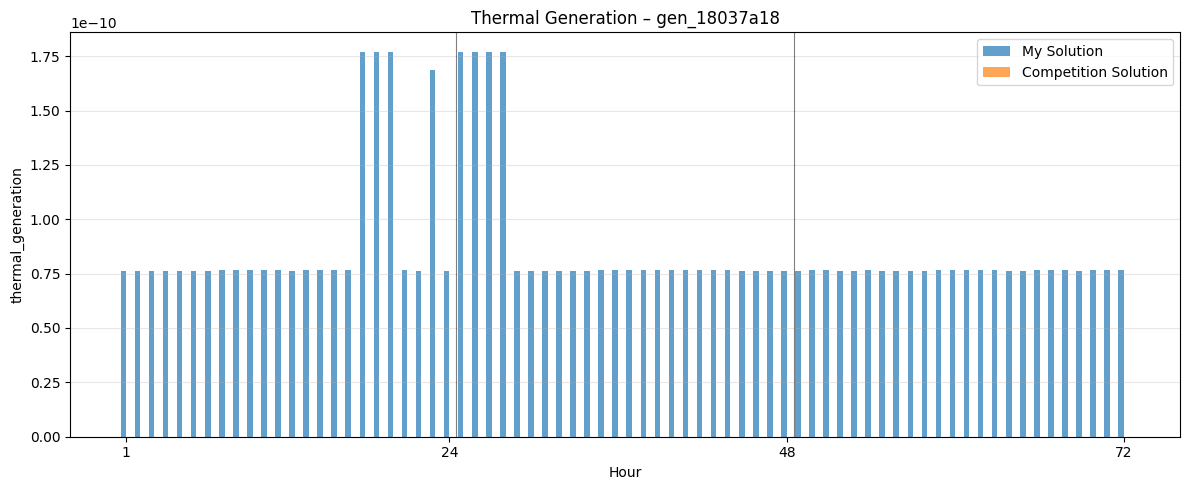

In [8]:
plot_one_unit("thermal_generation", "gen_18037a18", my_solution_cvx, competition_solution)